<a href="https://colab.research.google.com/github/sabinamunoz/lab-imbalanced-data/blob/master/lab_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

###**1. Load the dataset and explore the variables.**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IronHack Bootcamp/UNIT 3/customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

###**2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.**

In [9]:
df_pred = df[['Churn','tenure','SeniorCitizen','MonthlyCharges']]


In [10]:
df_pred.head()


,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70


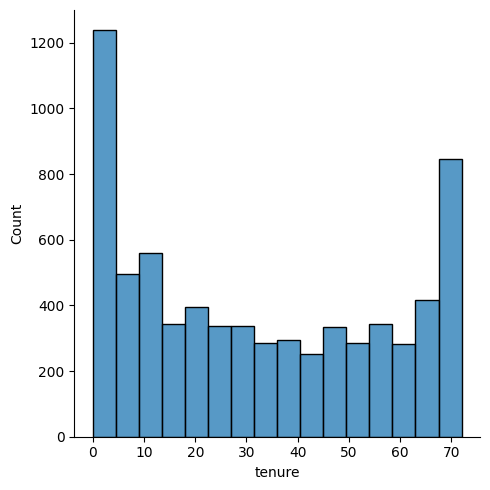

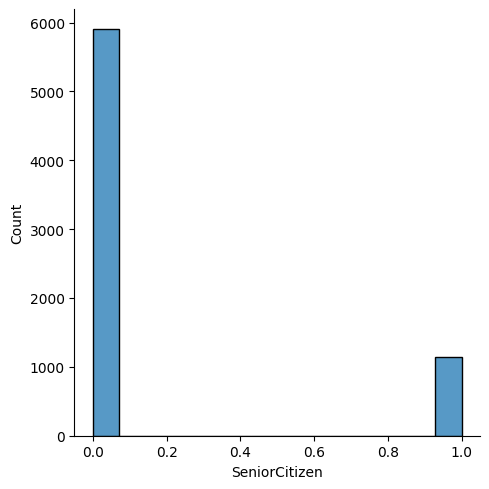

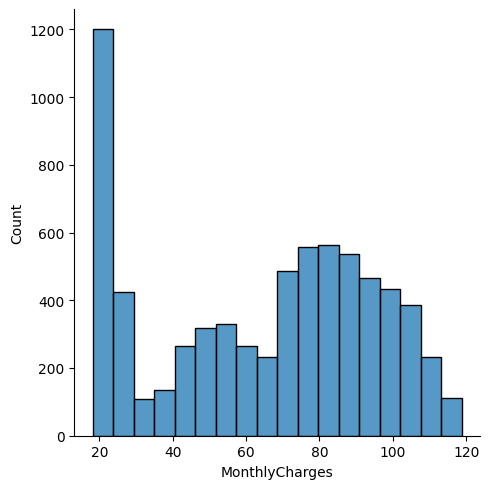

In [11]:
for col in df_pred.select_dtypes(np.number):
    sns.displot(df_pred[col])
    plt.show()

<ipython-input-12-02eb4f29722b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_pred.corr(method='pearson')  # default


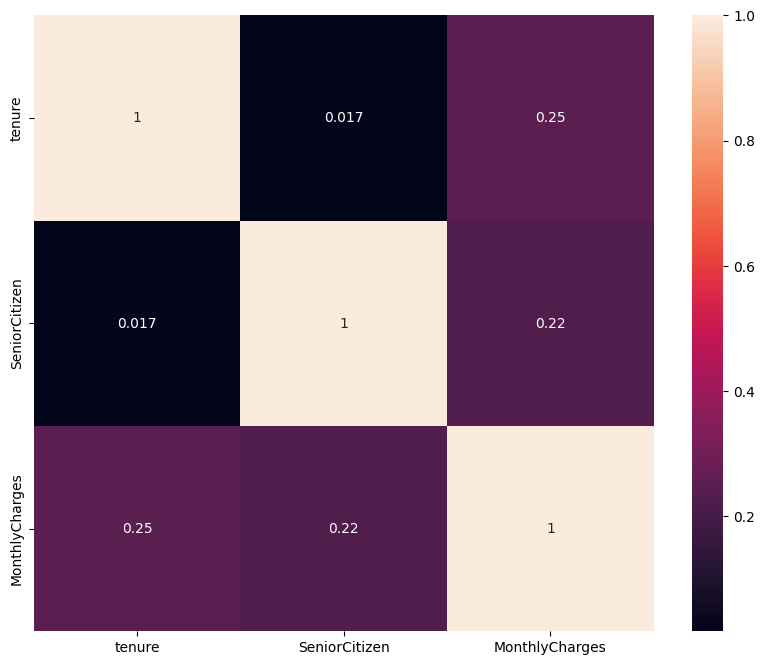

In [12]:
corr_matrix=df_pred.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### **3. Extract the target variable.**

In [15]:
y = df_pred['Churn']

### **4. Extract the independent variables and scale them.**

In [13]:
scaler = StandardScaler()

X = df_pred.drop('Churn', axis=1)
X_scaled = scaler.fit_transform(X)


### **5. Build the logistic regression model.**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)

###**6. Evaluate the model.**

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



<Axes: >

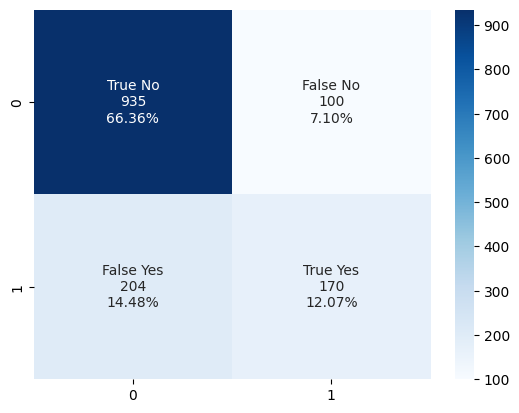

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ROC AUC:  0.818480198403472


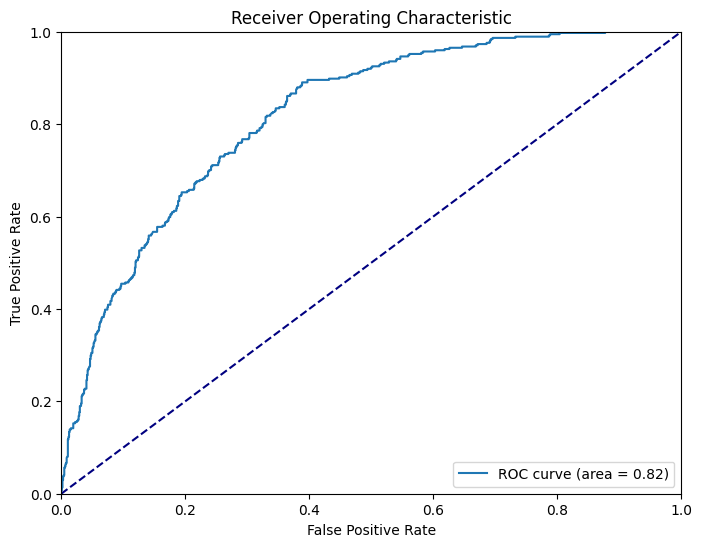

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
# Predict probabilities
probs = classification.predict_proba(X_test)

# keep only probabilities for positive class
probs = probs[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, probs)
print('ROC AUC: ', roc_auc)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

###**7. Even a simple model will give us more than 70% accuracy. Why?**

The model's precision lies in its ability to make accurate forecasts, correctly identifying outcomes out of all its predictions. In a scenario involving binary classification, this pertains to the count of true positives (correctly spotting customers who are genuinely leaving) and true negatives (correctly identifying customers who are staying put), divided by the total predictions.

The overall precision rate stands at approximately 78%. This signifies that the model adeptly forecasts whether a customer will churn, or not, in roughly 78% of instances.

Nevertheless, relying solely on accuracy might not always be the optimal approach for assessing a model, especially when confronted with imbalanced datasets (i.e., a situation where the number of non-churning customers significantly outweighs the number of churning customers).

Models trained on such imbalanced datasets can artificially inflate their accuracy by consistently predicting the majority class. Consequently, they are likely to overlook many churning customers (the minority category) - the group of customers we are most keen on pinpointing.

In the upcoming section, we will delve deeper into metrics like recall, precision, and ROC AUC as evaluation tools for different models (including SMOTE and Tomek Links). These metrics will provide a more comprehensive understanding of how effectively the models perform concerning the minority class (churning customers), which aligns with the vital business goal of curbing churn.

###**8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement**

In [19]:
from imblearn.over_sampling import SMOTE

X = df_pred.drop('Churn', axis=1)
y = df_pred['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.87      0.71      0.79      1035
         Yes       0.47      0.71      0.57       374

    accuracy                           0.71      1409
   macro avg       0.67      0.71      0.68      1409
weighted avg       0.77      0.71      0.73      1409



In [20]:
print(metrics.confusion_matrix(y_test, predictions))

[[738 297]
 [107 267]]


<Axes: >

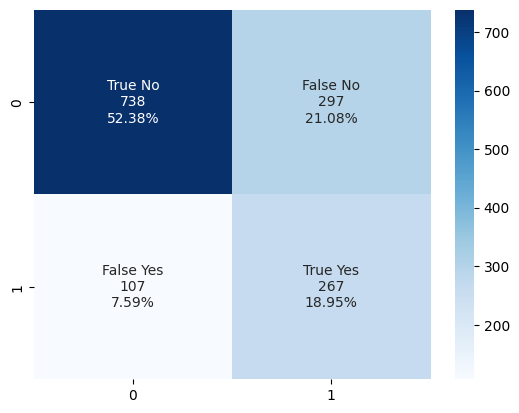

In [21]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ROC AUC:  0.8068963290190911


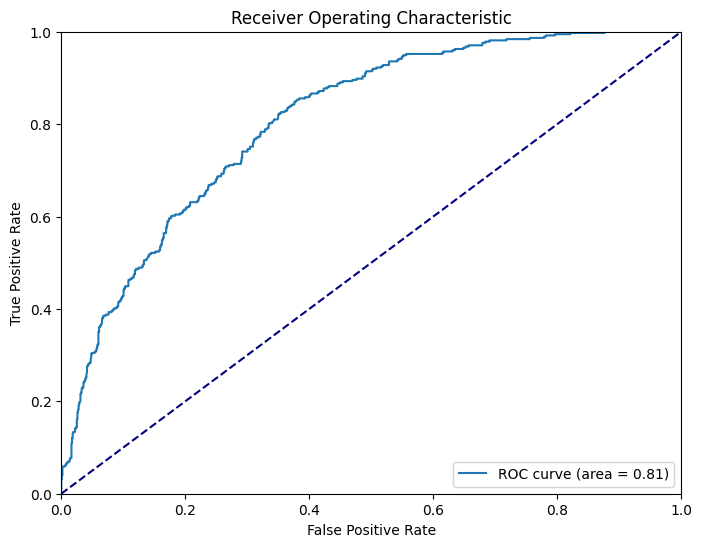

In [22]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


probs = classification.predict_proba(X_test)

probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)


roc_auc = roc_auc_score(y_test, probs)
print('ROC AUC: ', roc_auc)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?**

In [23]:
from imblearn.under_sampling import TomekLinks

X = df_pred.drop('Churn', axis=1)
y = df_pred['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tomek = TomekLinks()
X_train, y_train = tomek.fit_resample(X_train, y_train)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.84      0.87      0.85      1035
         Yes       0.59      0.54      0.56       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



In [24]:
print(metrics.confusion_matrix(y_test, predictions))


[[896 139]
 [173 201]]


<Axes: >

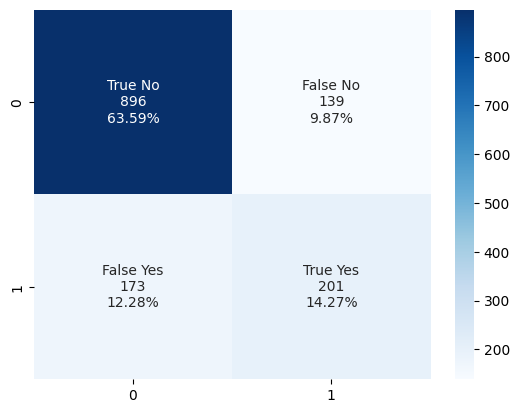

In [25]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ROC AUC:  0.8183665297476038


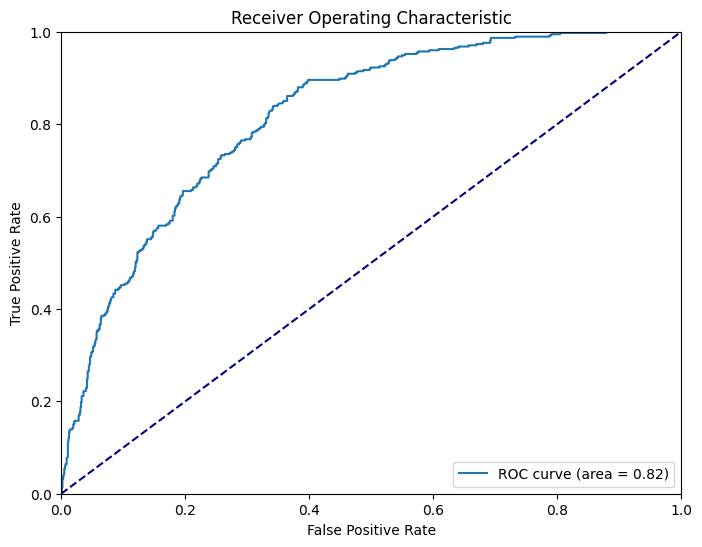

In [26]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

probs = classification.predict_proba(X_test)


probs = probs[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, probs)


roc_auc = roc_auc_score(y_test, probs)
print('ROC AUC: ', roc_auc)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()